# Adobe Analytics Template

Used for quick set up and analysis in Adobe Analytics. 

Contains
- Authentication
- Connect Key metrics
    - NLO App Starts
    - App Completes (event43 & corrected metric)
    - Visits, UVS
    
**Documentation**
- Visualisation
    - [Altair](https://altair-viz.github.io/gallery/simple_bar_chart.html)
    - [Vincent](https://vincent.readthedocs.io/en/latest/index.html)
    - [MatplotLib](https://matplotlib.org/)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/)

In [8]:
# import modules

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import json 

# Visualisations
import altair as alt
% matplotlib inline

# adobe_analytics api modules
from adobe_analytics import Client
from adobe_analytics import ReportDefinition

# Import credentials json file
with open('adobe_creds.json') as f:
    data = json.load(f)


#### define adobe client using credentials  ####
client = Client.from_json("adobe_creds.json")

# define desktop report suite
dsk_suite = client.suites()['seekemployment']



## Metrics and Segments

- To load Apps Metrics runt the **Magic** Cell
    - Contains suite info, metrics, segments

In [ ]:
%load app_metrics.py

In [9]:
####   METRICS AND SEGMENTS ####

## METRICS

# DESKTOP & MOBILE WEB

# App Starts
app_starts = dsk_suite.metrics()['event42']

# Application Complete (event43) - corrected
app_comp_corrected = dsk_suite.metrics()['cm200000660_5a935ddf1a444f63ff922d9e']

# Visit WEB Adjusted
visit_web_adjusted = dsk_suite.metrics()['cm200000660_5a77818241c44b21935d85af']

# UV WEB Adjusted
uv_web_adjusted = dsk_suite.metrics()['cm200000660_5a778e0141c44b21935d8726']

# Visits
visits = dsk_suite.metrics()['visits']

# Unique Visitors
unique_visitors = dsk_suite.metrics()['uniquevisitors']

# Logged In Visit (desktop & mobile)
logged_in_visit = dsk_suite.segments()['s200000660_5744f53be4b0394472dfd34f']



## SEGMENTS

# # DESKTOP & MOBILE WEB

# 'name': 'Web: Historical data corrected'
web_hist = dsk_suite.segments()['s200000660_574f937be4b0413ef9fff1c0']

# Historical data corrections: Desktop
hist_corr_desk = dsk_suite.segments()['s200000660_574f8a32e4b01a846f1176c8']


# 'name': 'NLO app start'
nlo_seg = dsk_suite.segments()['s200000660_58a2251ce4b034c46031b4aa']

# Desktop Device Type
desktop_devices = dsk_suite.segments()['s200000660_5994eb5a05871b59955e5f8f']

# Mobile Web Experience
mobile_devices = dsk_suite.segments()['s200000660_5994ec063b991261845d5a04']

# Exclude No Impression and No PV
ex_no_imp_no_pv = dsk_suite.segments()['s200000660_59fbb5cf506c8f0db6789512']



# Build a report

In [29]:
# %load nlo_conversion_web.py

# define dates & granularity
# dynamic dates ie 1 day 

start_date = (datetime.today() - timedelta(30)).strftime(format='%Y-%m-%d')
end_date = (datetime.today() - timedelta(1)).strftime(format='%Y-%m-%d')
granularity = 'day'



################## TOTAL WEB STARTS & COMPLETES

# App Starts
tot_nlo_start_rep = ReportDefinition(
    dimensions=[],
    metrics=[app_starts],
    segments=[web_hist, nlo_seg],
    date_from=start_date,
    date_to=end_date,
    granularity=granularity
)

# App Completes
tot_app_comp_rep = ReportDefinition(
    dimensions=[],
    metrics=[app_comp_corrected],
    segments=[web_hist],
    date_from=start_date,
    date_to=end_date,
    granularity=granularity
)
print('Total Web App Start/Complete reports created')

################## DESKTOP WEB 

# App Starts
dsk_nlo_start_rep = ReportDefinition(
    dimensions=[],
    metrics=[app_starts],
    segments=[web_hist, nlo_seg, desktop_devices, hist_corr_desk],
    date_from=start_date,
    date_to=end_date,
    granularity=granularity
)

# App Completes
dsk_app_comp_rep = ReportDefinition(
    dimensions=[],
    metrics=[app_comp_corrected],
    segments=[web_hist, desktop_devices, hist_corr_desk],
    date_from=start_date,
    date_to=end_date,
    granularity=granularity
)
print('Desktop Web App Start/Complete reports created')

################## MOBILE WEB

# App Starts
mob_nlo_start_rep = ReportDefinition(
    dimensions=[],
    metrics=[app_starts],
    segments=[web_hist, nlo_seg, mobile_devices],
    date_from=start_date,
    date_to=end_date,
    granularity=granularity
)

# App Completes
mob_app_comp_rep = ReportDefinition(
    dimensions=[],
    metrics=[app_comp_corrected],
    segments=[web_hist, mobile_devices],
    date_from=start_date,
    date_to=end_date,
    granularity=granularity
)
print('Mobile Web App Start/Complete reports created')





############## DOWNLOAD REPORT REQUESTS

#### TOTAL WEB

# App Starts
tot_nlo_start = dsk_suite.download(tot_nlo_start_rep)
# App completes
tot_app_comp = dsk_suite.download(tot_app_comp_rep)

# merge requests together
total_web_nlo = pd.merge(tot_nlo_start, tot_app_comp, how='left', on='Date')

# create % col
total_web_nlo['nlo_onversion'] = total_web_nlo['Application Complete (event43) - corrected'].astype(int) / total_web_nlo['Apps Started (event42)'].astype(int)
total_web_nlo['report_type'] = 'total_web'

total_web_nlo.columns = ['date', 'app_starts', 'app_completes', 'nlo_conversion', 'report_type']

print('Total Web App Start/Complete Reports Downloaded')






#### DESKTOP WEB

# App Starts
dsk_nlo_start = dsk_suite.download(dsk_nlo_start_rep)
# App Completes
dsk_app_comp = dsk_suite.download(dsk_app_comp_rep)

# merge dfs together
dsk_web_nlo = pd.merge(dsk_nlo_start, dsk_app_comp, how='left', on='Date')

# create % col
dsk_web_nlo['nlo_onversion'] = dsk_web_nlo['Application Complete (event43) - corrected'].astype(int)/dsk_web_nlo['Apps Started (event42)'].astype(int)
dsk_web_nlo['report_type'] = 'desktop_web'

dsk_web_nlo.columns = ['date', 'app_starts', 'app_completes', 'nlo_conversion', 'report_type']

print('Desktop Web App Start/Complete Reports Downloaded')





#### MOBILE WEB

# App Starts
mob_nlo_start = dsk_suite.download(mob_nlo_start_rep)
# App Completes
mob_app_comp = dsk_suite.download(mob_app_comp_rep)

# merge dfs together
mob_web_nlo = pd.merge(mob_nlo_start, mob_app_comp, how='left', on='Date')

# create % col
mob_web_nlo['nlo_onversion'] = mob_web_nlo['Application Complete (event43) - corrected'].astype(int)/mob_web_nlo['Apps Started (event42)'].astype(int)
mob_web_nlo['report_type'] = 'mobile_web'

mob_web_nlo.columns = ['date', 'app_starts', 'app_completes', 'nlo_conversion', 'report_type']

print('Mobile Web App Start/Complete Reports Downloaded')
print(' \n all done!!')

Total Web App Start/Complete reports created
Desktop Web App Start/Complete reports created
Mobile Web App Start/Complete reports created
Total Web App Start/Complete Reports Downloaded
Desktop Web App Start/Complete Reports Downloaded
Mobile Web App Start/Complete Reports Downloaded


In [48]:
# MERGE REPORTS INTO MASTER
nlo_frames = [total_web_nlo, dsk_web_nlo, mob_web_nlo]

# concatenate DFs together
df_nlo = pd.concat(nlo_frames, sort=True)
# reset the index
df_nlo.reset_index(drop=True, inplace=True)


# Merge the frames together using date and report type
#df_candi_extract = pd.merge(df_nlo, df_visits, on=['date', 'report_type'], how='left')
df = df_nlo[['date','report_type', 'app_starts', 'app_completes', 'nlo_conversion']]

# convert data types
df['date'] = pd.to_datetime(df['date'])
df['report_type'] = df['report_type'].astype('category')
df['app_starts'] = df['app_starts'].astype('int32')
df['app_completes'] = df['app_completes'].astype('int32')
df['nlo_conversion'] = df['nlo_conversion'].astype('float32')

# save to file
date = datetime.now().strftime(format='%Y-%m-%d')
file_name = 'nlo_conversion_{}.csv'.format(date)

#df_candi_extract.to_csv(file_name, header=True, index=False)
df.head()

,date,report_type,app_starts,app_completes,nlo_conversion
0,2018-11-17,total_web,78288,53333,0.681241
1,2018-11-18,total_web,91914,63548,0.691385
2,2018-11-19,total_web,203563,143280,0.703861
3,2018-11-20,total_web,198284,139752,0.704807
4,2018-11-21,total_web,187334,131888,0.704026


# plot data

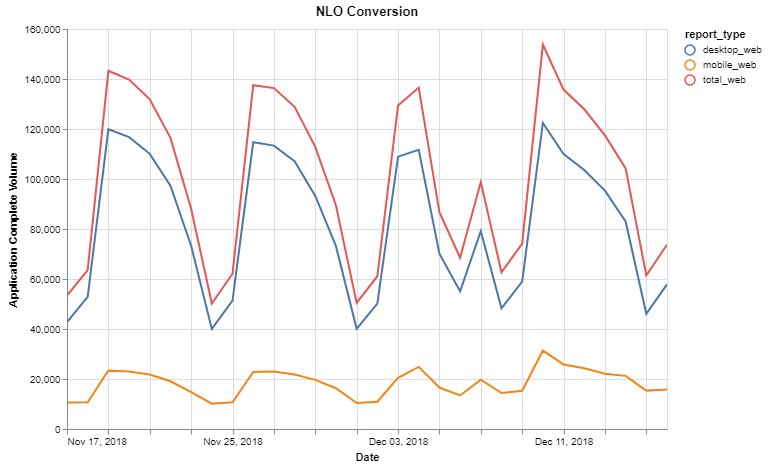

In [69]:
data = df.query('report_type == "desktop_web"')

alt.Chart(df, height=400, width=600).mark_line().encode(
    x = alt.X('date', axis=alt.Axis(title='Date')),
    y = alt.Y('app_completes', axis=alt.Axis(title='Application Complete Volume')),
    color = 'report_type').properties(title="NLO Conversion").interactive()